# Анализ тарифов "Смарт" и "Ультра" 

Предварительный анализ тарифов будет производиться на небольшой выборке клиентов «Мегалайна» с целью  проанализировать их поведение  и сделать вывод — какой тариф лучше.
Цель - выяснить, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.

## Изучение и предобработка данных из файла
**Описание данных**

**Таблица users (информация о пользователях):**

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tarif — название тарифного плана

**Таблица calls (информация о звонках):**

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')


**Рассмотрим в отдельности каждый из имеющихся датафреймов:**

**USERS**

In [3]:
display(users.sample(25))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
153,1153,59,NaN,Ульяновск,Евдокия,Одинцова,2018-10-18,smart
32,1032,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart
299,1299,37,NaN,Уфа,Мариетта,Симонова,2018-01-27,smart
167,1167,30,NaN,Кемерово,Клавдия,Абдулина,2018-09-29,ultra
117,1117,42,NaN,Тюмень,Дана,Меркулова,2018-12-10,smart
154,1154,19,NaN,Волжский,Марина,Тихомирова,2018-06-02,smart
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart
453,1453,50,NaN,Москва,Кузьма,Акуленко,2018-01-01,ultra
439,1439,62,NaN,Орёл,Евгения,Афонина,2018-06-30,smart
286,1286,19,NaN,Москва,Рашид,Троицкий,2018-11-27,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски в датафрейме не случайны. NaN в столбце churn_date означает, что пользователь активен. Значения в данном столбце, а также в столбце reg_date приведем к типу datetime:

In [4]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

В рамках исследования нас не интересуют ФИО абонентов и их возраст, поэтому от данных столбцов мы можем отказаться:

In [5]:
columns = [
    'user_id', 'churn_date', 'city', 'reg_date', 'tariff'
]
users = users[columns]

In [6]:
users['user_id'].value_counts()

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

Все значения столбца уникальны. 500 уникальных id

**CALLS**

In [7]:
display(calls.sample(25))
calls.info()

,id,call_date,duration,user_id
89900,1225_160,2018-06-08,9.05,1225
48869,1122_14,2018-11-25,5.07,1122
66376,1168_1527,2018-03-08,0.00,1168
53623,1134_684,2018-02-19,13.15,1134
15431,1041_129,2018-12-10,0.00,1041
42473,1104_375,2018-09-15,14.65,1104
51889,1130_177,2018-05-27,3.69,1130
127582,1327_157,2018-12-31,12.51,1327
36755,1093_33,2018-07-08,11.83,1093
194410,1477_158,2018-12-19,6.08,1477


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Столбец duration округлим в большую сторону, исходя из политики Мегалайна. Столбец call_date приведем к типу даты и создадим ещё один столбец со значением месяца, в который происходил звонок. Столбец с уникальным id звонка опустим, так как они не пригодятся в дальнейших вычислениях.

In [8]:
calls['duration'].isna().sum()

0

In [9]:
calls['duration_cell']=np.ceil(calls['duration'])

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [11]:
calls['service_month']= pd.DatetimeIndex(calls['call_date']).month

In [12]:
columns = [
    'user_id', 'call_date', 'service_month', 'duration_cell'
]
calls = calls[columns]

**Messages**

In [13]:
display(messages.sample(25))
messages.info()

,id,message_date,user_id
36401,1158_206,2018-03-23,1158
111093,1449_434,2018-11-07,1449
52088,1231_709,2018-08-01,1231
52344,1231_965,2018-12-27,1231
1829,1004_883,2018-05-23,1004
93106,1382_567,2018-06-04,1382
103804,1423_137,2018-10-28,1423
89199,1373_211,2018-06-26,1373
13116,1055_82,2018-10-01,1055
9096,1035_331,2018-08-25,1035


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В данном датафрейме приведем к типу даты столбец message_date и по аналогии с таблицей звонков сделаем столбец, маркирующий месяц совершения действия.

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [15]:
messages['service_month']= pd.DatetimeIndex(messages['message_date']).month

**INTERNET**

In [16]:
display(internet.sample(25))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
78551,78551,1264_170,120.79,2018-09-17,1264
6451,6451,1021_95,833.33,2018-05-24,1021
134040,134040,1449_195,566.97,2018-08-20,1449
104285,104285,1353_221,198.00,2018-06-28,1353
97111,97111,1327_32,524.84,2018-09-18,1327
32865,32865,1115_68,0.00,2018-09-27,1115
91439,91439,1309_21,784.97,2018-12-24,1309
106146,106146,1359_5,265.64,2018-11-14,1359
107327,107327,1364_25,322.41,2018-12-05,1364
70456,70456,1240_124,630.43,2018-06-08,1240


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


По аналогии приведем столбец session_date к типу даты и вычленим в отдельный столбец service_month месяц использования услуги:


In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [18]:
internet['service_month']= pd.DatetimeIndex(internet['session_date']).month

In [19]:
internet['mb_used']=internet['mb_used']/1024

In [20]:
columns = [
    'user_id', 'mb_used', 'service_month', 'session_date'
]
internet = internet[columns]

**TARIFFS** 

Переименуем столбец tariff_name на tariff, так как по нему впоследствии произойдёт объединение этого фрейма и users

In [21]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [22]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tariffs.columns = ['messages_included','mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

In [24]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

### Вывод

Первичное изучение данных показалj, что датасетsи полные, критических пропущенных данных нет. Все таблицы пригодны для группировки и дальнейшего объединения.

## Подготовка данных
Очистить данные и посчитать:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет--трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Объединим в один датафрейм таблицы с расходом услуг, но сначала сгруппируем каждую из них по пользователям и месяцам.

In [25]:
calls_pivot = calls.pivot_table(index = ['user_id', 'service_month'], values = 'duration_cell', aggfunc = ['count', 'sum']).reset_index()
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (user_id, )             3174 non-null   int64  
 1   (service_month, )       3174 non-null   int64  
 2   (count, duration_cell)  3174 non-null   int64  
 3   (sum, duration_cell)    3174 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


In [26]:
calls_pivot.columns = ['user_id', 'service_month', 'duration_count', 'duration_sum']
calls_pivot

,user_id,service_month,duration_count,duration_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


Группировка помогла вычислить количество сделанных звонков и израсходованных минут разговора по месяцам.

In [27]:
messages_pivot = messages.pivot_table(index = ['user_id', 'service_month'], values = 'id', aggfunc = 'count').reset_index()
messages_pivot

,user_id,service_month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [28]:
messages_pivot.columns = ['user_id', 'service_month', 'messages_count']

Группировка позволила определить количество отправленных сообщений по месяцам;

In [29]:
internet_pivot = internet.pivot_table(index = ['user_id', 'service_month'], aggfunc = 'sum').reset_index()
internet_pivot

,user_id,service_month,mb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
...,...,...,...
3198,1498,10,20.097031
3199,1499,9,1.802490
3200,1499,10,17.371592
3201,1499,11,17.542295


In [30]:
internet_pivot['mb_used'] = np.ceil(internet_pivot['mb_used'])

In [31]:
internet_pivot

,user_id,service_month,mb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


Группировка продемонстрировала объем израсходованного интернет-трафика по месяцам (в Гигабайтах!);

In [32]:
df_calls_messages = calls_pivot.merge(messages_pivot, on = ['service_month', 'user_id'], how = 'outer')
df_calls_messages

,user_id,service_month,duration_count,duration_sum,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [33]:
df_all_services = df_calls_messages.merge(internet_pivot, on = ['service_month', 'user_id'], how = 'outer')
df_all_services

,user_id,service_month,duration_count,duration_sum,messages_count,mb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0
3210,1489,10,NaN,NaN,21.0,20.0
3211,1489,11,NaN,NaN,20.0,18.0
3212,1489,12,NaN,NaN,35.0,17.0


А теперь прибавим к таблице с абонентами данные о стоимости оказанных им улуг в зависимости от тарифа

In [34]:
df_users_tariffs = tariffs.merge(users[['user_id', 'tariff', 'city']], on='tariff', how='outer')
df_users_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city
0,50,15360,500,550,200,3,3,smart,1001,Москва
1,50,15360,500,550,200,3,3,smart,1002,Стерлитамак
2,50,15360,500,550,200,3,3,smart,1005,Набережные Челны
3,50,15360,500,550,200,3,3,smart,1006,Ульяновск
4,50,15360,500,550,200,3,3,smart,1007,Москва
...,...,...,...,...,...,...,...,...,...,...
495,1000,30720,3000,1950,150,1,1,ultra,1476,Москва
496,1000,30720,3000,1950,150,1,1,ultra,1485,Киров
497,1000,30720,3000,1950,150,1,1,ultra,1491,Челябинск
498,1000,30720,3000,1950,150,1,1,ultra,1493,Красноярск


Теперь объединим два полученных датафрейма в единый по пользователям:

In [35]:
df_full = df_users_tariffs.merge(df_all_services, on='user_id', how='outer').reset_index(drop=True)
df_full

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used
0,50,15360,500,550,200,3,3,smart,1001,Москва,11.0,59.0,430.0,NaN,18.0
1,50,15360,500,550,200,3,3,smart,1001,Москва,12.0,63.0,414.0,NaN,14.0
2,50,15360,500,550,200,3,3,smart,1002,Стерлитамак,6.0,15.0,117.0,4.0,11.0
3,50,15360,500,550,200,3,3,smart,1002,Стерлитамак,7.0,26.0,214.0,11.0,18.0
4,50,15360,500,550,200,3,3,smart,1002,Стерлитамак,8.0,42.0,289.0,13.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1000,30720,3000,1950,150,1,1,ultra,1495,Иркутск,8.0,17.0,92.0,13.0,3.0
3212,1000,30720,3000,1950,150,1,1,ultra,1495,Иркутск,9.0,112.0,813.0,82.0,33.0
3213,1000,30720,3000,1950,150,1,1,ultra,1495,Иркутск,10.0,152.0,1030.0,82.0,29.0
3214,1000,30720,3000,1950,150,1,1,ultra,1495,Иркутск,11.0,129.0,954.0,79.0,39.0


In [36]:
df_full.isnull().sum()

messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff                     0
user_id                    0
city                       0
service_month              2
duration_count            42
duration_sum              42
messages_count           499
mb_used                   13
dtype: int64

В объединенном датафрейме пропущенные значения могут означать, что пользователь просто не пользовался услугой в конкретный месяц, поэтому пропуски заменим на '0'

In [37]:
df_full = df_full.fillna(0)

In [38]:
df_full.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff                   0
user_id                  0
city                     0
service_month            0
duration_count           0
duration_sum             0
messages_count           0
mb_used                  0
dtype: int64

In [39]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      3216 non-null   int64  
 1   mb_per_month_included  3216 non-null   int64  
 2   minutes_included       3216 non-null   int64  
 3   rub_monthly_fee        3216 non-null   int64  
 4   rub_per_gb             3216 non-null   int64  
 5   rub_per_message        3216 non-null   int64  
 6   rub_per_minute         3216 non-null   int64  
 7   tariff                 3216 non-null   object 
 8   user_id                3216 non-null   int64  
 9   city                   3216 non-null   object 
 10  service_month          3216 non-null   float64
 11  duration_count         3216 non-null   float64
 12  duration_sum           3216 non-null   float64
 13  messages_count         3216 non-null   float64
 14  mb_used                3216 non-null   float64
dtypes: f

Для удобства расчетов доработаем df_full в части метрики интернета и типов данных

In [40]:
int_64 = ['service_month', 'duration_count', 'duration_sum', 'messages_count', 'mb_used', 'mb_per_month_included']

for i in int_64:
    df_full[i] = df_full[i].astype('Int64')

In [41]:
df_full['mb_per_month_included'] = df_full['mb_per_month_included']/1024

In [42]:
df_full.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used
0,50,15.0,500,550,200,3,3,smart,1001,Москва,11,59,430,0,18
1,50,15.0,500,550,200,3,3,smart,1001,Москва,12,63,414,0,14
2,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,6,15,117,4,11
3,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,7,26,214,11,18
4,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,8,42,289,13,20


In [43]:
df_full['mb_per_month_included'] = df_full['mb_per_month_included'].astype('Int64')

In [44]:
df_full.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used
0,50,15,500,550,200,3,3,smart,1001,Москва,11,59,430,0,18
1,50,15,500,550,200,3,3,smart,1001,Москва,12,63,414,0,14
2,50,15,500,550,200,3,3,smart,1002,Стерлитамак,6,15,117,4,11
3,50,15,500,550,200,3,3,smart,1002,Стерлитамак,7,26,214,11,18
4,50,15,500,550,200,3,3,smart,1002,Стерлитамак,8,42,289,13,20


Посчитаем помесячную выручку сначала по каждой услуге с каждого пользователя:

In [45]:
df_full['calls_revenue'] = ((df_full['duration_sum'] - df_full['minutes_included']) * df_full['rub_per_minute'])
df_full['messages_revenue'] = ((df_full['messages_count'] - df_full['messages_included']) * df_full['rub_per_message'])
df_full['mb_revenue'] = ((df_full['mb_used'] - df_full['mb_per_month_included']) * df_full['rub_per_gb'])

In [46]:
df_full.sample(25)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used,calls_revenue,messages_revenue,mb_revenue
2765,1000,30,3000,1950,150,1,1,ultra,1300,Москва,10,111,731,191,38,-2269,-809,1200
1544,50,15,500,550,200,3,3,smart,1339,Москва,12,77,617,0,21,351,-150,1200
1517,50,15,500,550,200,3,3,smart,1332,Москва,12,65,500,30,18,0,-60,600
2472,1000,30,3000,1950,150,1,1,ultra,1126,Санкт-Петербург,12,84,614,3,33,-2386,-997,450
119,50,15,500,550,200,3,3,smart,1026,Мурманск,10,72,535,39,14,105,-33,-200
1037,50,15,500,550,200,3,3,smart,1221,Белгород,8,24,138,33,16,-1086,-51,200
2097,50,15,500,550,200,3,3,smart,1475,Новокузнецк,4,42,230,21,13,-810,-87,-400
2556,1000,30,3000,1950,150,1,1,ultra,1185,Санкт-Петербург,8,121,797,0,42,-2203,-1000,1800
2558,1000,30,3000,1950,150,1,1,ultra,1185,Санкт-Петербург,10,125,929,0,38,-2071,-1000,1200
1699,50,15,500,550,200,3,3,smart,1386,Новосибирск,8,41,238,24,15,-786,-78,0


Отрицательные значения в колонка означают, что абонент не использовал полностью включенные в ежемесячный пакет опции. Выручка в таких случаях равна 0. Заменим отрицательные значения в созданных столбцах.

In [47]:
df_full['calls_revenue'] = df_full['calls_revenue'].clip(lower = 0)
df_full['messages_revenue'] = df_full['messages_revenue'].clip(lower = 0)
df_full['mb_revenue']= df_full['mb_revenue'].clip(lower = 0)

Добавим ещё один столбец, который посчитает общую выручку, с учётом затрат на а/п:

In [48]:
df_full['revenue'] = df_full['rub_monthly_fee'] + df_full['calls_revenue'] + df_full['messages_revenue'] + df_full['mb_revenue']

Сгруппируем итоговые данные по тарифу, чтобы сравнить прибыль

In [49]:
revenue_pivot = df_full.pivot_table(index = 'tariff', values = ['calls_revenue', 'messages_revenue', 'mb_revenue', 'revenue'], aggfunc = 'sum')
revenue_pivot

,calls_revenue,mb_revenue,messages_revenue,revenue
tariff,,,,
smart,278217,1332400,38784,2875901
ultra,0,118350,0,2041050


### Вывод

За 2018 год бОльшую выручку Мегалайну принесли абоненты тарифа Смарт. Самая доходная статья - это интернет-трафик сверх того, что включено в абонентскую плату.

## Анализ данных
Описать поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитать среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Чтобы описать поведение клиентов в зависимости от тарифа, нужно разделить df_full на две выборки по категории принадлежности к тарифу:

In [50]:
smart_users = df_full.query('tariff == "smart"')
smart_users

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used,calls_revenue,messages_revenue,mb_revenue,revenue
0,50,15,500,550,200,3,3,smart,1001,Москва,11,59,430,0,18,0,0,600,1150
1,50,15,500,550,200,3,3,smart,1001,Москва,12,63,414,0,14,0,0,0,550
2,50,15,500,550,200,3,3,smart,1002,Стерлитамак,6,15,117,4,11,0,0,0,550
3,50,15,500,550,200,3,3,smart,1002,Стерлитамак,7,26,214,11,18,0,0,600,1150
4,50,15,500,550,200,3,3,smart,1002,Стерлитамак,8,42,289,13,20,0,0,1000,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,50,15,500,550,200,3,3,smart,1498,Владикавказ,10,41,247,42,21,0,0,1200,1750
2226,50,15,500,550,200,3,3,smart,1499,Пермь,9,9,70,11,2,0,0,0,550
2227,50,15,500,550,200,3,3,smart,1499,Пермь,10,68,449,48,18,0,0,600,1150
2228,50,15,500,550,200,3,3,smart,1499,Пермь,11,74,612,59,18,336,27,600,1513


In [51]:
ultra_users = df_full.query('tariff == "ultra"')
ultra_users

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,service_month,duration_count,duration_sum,messages_count,mb_used,calls_revenue,messages_revenue,mb_revenue,revenue
2230,1000,30,3000,1950,150,1,1,ultra,1000,Краснодар,5,22,159,22,3,0,0,0,1950
2231,1000,30,3000,1950,150,1,1,ultra,1000,Краснодар,6,43,172,60,23,0,0,0,1950
2232,1000,30,3000,1950,150,1,1,ultra,1000,Краснодар,7,47,340,75,14,0,0,0,1950
2233,1000,30,3000,1950,150,1,1,ultra,1000,Краснодар,8,52,408,81,14,0,0,0,1950
2234,1000,30,3000,1950,150,1,1,ultra,1000,Краснодар,9,58,466,57,15,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1000,30,3000,1950,150,1,1,ultra,1495,Иркутск,8,17,92,13,3,0,0,0,1950
3212,1000,30,3000,1950,150,1,1,ultra,1495,Иркутск,9,112,813,82,33,0,0,450,2400
3213,1000,30,3000,1950,150,1,1,ultra,1495,Иркутск,10,152,1030,82,29,0,0,0,1950
3214,1000,30,3000,1950,150,1,1,ultra,1495,Иркутск,11,129,954,79,39,0,0,1350,3300


**SMART**

In [52]:
smart_users_pivot = smart_users.pivot_table(index = ['service_month'], values = ['duration_sum', 'messages_count', 'mb_used'], aggfunc = 'mean')
smart_users_pivot

,duration_sum,mb_used,messages_count
service_month,,,
0,0.0,0.0,0.0
1,203.852941,8.735294,18.235294
2,298.689655,11.844828,24.086207
3,390.051948,15.233766,31.857143
4,367.133929,13.625,30.741071
5,387.361702,15.907801,33.77305
6,395.640244,15.95122,33.402439
7,408.353234,15.875622,33.751244
8,421.468085,16.73617,33.638298


In [53]:
smart_users_pivot.drop(labels = [0],axis = 0, inplace = True)
smart_users_pivot

,duration_sum,mb_used,messages_count
service_month,,,
1,203.852941,8.735294,18.235294
2,298.689655,11.844828,24.086207
3,390.051948,15.233766,31.857143
4,367.133929,13.625,30.741071
5,387.361702,15.907801,33.77305
6,395.640244,15.95122,33.402439
7,408.353234,15.875622,33.751244
8,421.468085,16.73617,33.638298
9,428.611538,16.392308,33.638462


In [54]:
smart_users_pivot['duration_sum'].describe()

count     12.000000
mean     386.760499
std       72.262004
min      203.852941
25%      382.304759
50%      401.996739
75%      426.754925
max      478.560831
Name: duration_sum, dtype: float64

In [55]:
smart_users_pivot['mb_used'].describe()

count    12.000000
mean     15.198728
std       2.626973
min       8.735294
25%      14.831575
50%      15.929510
75%      16.772366
max      18.201780
Name: mb_used, dtype: float64

In [56]:
smart_users_pivot['messages_count'].describe()

count    12.000000
mean     31.413211
std       5.103413
min      18.235294
25%      31.578125
50%      33.638380
75%      33.767242
max      35.994065
Name: messages_count, dtype: float64

**Пользователям тарифа Smart в среднем в месяц требуется около 387 минут исходящих вызовов, 15 Гб интернет-трафика и 31-32 смски**

Стандартное отклонение и дисперсия для среднемесячных показателей:

In [57]:
print('Стандартное отклонение (звонки):', smart_users_pivot['duration_sum'].describe()['std'])
print('Дисперсия (звонки):', smart_users_pivot['duration_sum'].describe()['std']**2)
print('Стандартное отклонение (Гб интернета):', smart_users_pivot['mb_used'].describe()['std'])
print('Дисперсия (Гб интернета):', smart_users_pivot['mb_used'].describe()['std']**2)
print('Стандартное отклонение (смски):', smart_users_pivot['messages_count'].describe()['std'])
print('Дисперсия (смски):', smart_users_pivot['messages_count'].describe()['std']**2)

Стандартное отклонение (звонки): 72.26200398840187
Дисперсия (звонки): 5221.797220419808
Стандартное отклонение (Гб интернета): 2.6269725315358126
Дисперсия (Гб интернета): 6.900984681443676
Стандартное отклонение (смски): 5.103413278609601
Дисперсия (смски): 26.044827092288795


Стандартное отклонение и дисперсия для всей выборки по тарифу Смарт:

In [58]:
print('Стандартное отклонение (звонки):', smart_users['duration_sum'].describe()['std'])
print('Дисперсия (звонки):', smart_users['duration_sum'].describe()['std']**2)
print('Стандартное отклонение (Гб интернета):', smart_users['mb_used'].describe()['std'])
print('Дисперсия (Гб интернета):', smart_users['mb_used'].describe()['std']**2)
print('Стандартное отклонение (смски):', smart_users['messages_count'].describe()['std'])
print('Дисперсия (смски):', smart_users['messages_count'].describe()['std']**2)

Стандартное отклонение (звонки): 190.4767540579285
Дисперсия (звонки): 36281.393836444586
Стандартное отклонение (Гб интернета): 5.7561665225657155
Дисперсия (Гб интернета): 33.13345303550628
Стандартное отклонение (смски): 28.230395954185852
Дисперсия (смски): 796.9552557301129


**ULTRA**

In [59]:
ultra_users_pivot = ultra_users.pivot_table(index = ['service_month'], values = ['duration_sum', 'messages_count', 'mb_used'], aggfunc = 'mean')
ultra_users_pivot

,duration_sum,mb_used,messages_count
service_month,,,
0,0.0,0.0,0.0
1,428.111111,13.222222,33.777778
2,297.125,12.0,21.958333
3,489.648649,17.648649,32.297297
4,458.018182,16.963636,31.563636
5,510.328358,19.373134,37.850746
6,479.702381,18.940476,41.72619
7,545.791209,20.505495,49.846154
8,510.775701,19.598131,48.439252


In [60]:
ultra_users_pivot.drop(labels = [0],axis = 0, inplace = True)
ultra_users_pivot

,duration_sum,mb_used,messages_count
service_month,,,
1,428.111111,13.222222,33.777778
2,297.125,12.0,21.958333
3,489.648649,17.648649,32.297297
4,458.018182,16.963636,31.563636
5,510.328358,19.373134,37.850746
6,479.702381,18.940476,41.72619
7,545.791209,20.505495,49.846154
8,510.775701,19.598131,48.439252
9,539.443478,19.243478,52.286957


In [61]:
ultra_users_pivot['duration_sum'].describe()

count     12.000000
mean     495.934310
std       77.450072
min      297.125000
25%      474.281331
50%      510.552030
75%      542.483250
max      592.805755
Name: duration_sum, dtype: float64

In [62]:
ultra_users_pivot['mb_used'].describe()

count    12.000000
mean     18.258937
std       2.921533
min      12.000000
25%      17.477396
50%      19.308306
75%      19.870738
max      21.741007
Name: mb_used, dtype: float64

In [63]:
ultra_users_pivot['messages_count'].describe()

count    12.000000
mean     43.714983
std      12.320470
min      21.958333
25%      33.407658
50%      45.082721
75%      53.162979
max      60.611511
Name: messages_count, dtype: float64

**Пользователям тарифа Ultra среднемесячно требуется 511 минут исходящих вызовов, 18 Гб интернета, 43-44 смски**

Стандартное отклонение и дисперсия для среднемесячных показателей:

In [64]:
print('Стандартное отклонение (звонки):', ultra_users_pivot['duration_sum'].describe()['std'])
print('Дисперсия (звонки):', ultra_users_pivot['duration_sum'].describe()['std']**2)
print('Стандартное отклонение (Гб интернета):', ultra_users_pivot['mb_used'].describe()['std'])
print('Дисперсия (Гб интернета):', ultra_users_pivot['mb_used'].describe()['std']**2)
print('Стандартное отклонение (смски):', ultra_users_pivot['messages_count'].describe()['std'])
print('Дисперсия (смски):', ultra_users_pivot['messages_count'].describe()['std']**2)

Стандартное отклонение (звонки): 77.45007182218454
Дисперсия (звонки): 5998.513625261544
Стандартное отклонение (Гб интернета): 2.921532788081398
Дисперсия (Гб интернета): 8.535353831834666
Стандартное отклонение (смски): 12.320470269273553
Дисперсия (смски): 151.79398765605353


Стандартное отклонение и дисперсия для всей выборки тарифа Ультра:

In [65]:
print('Стандартное отклонение (звонки):', ultra_users['duration_sum'].describe()['std'])
print('Дисперсия (звонки):', ultra_users['duration_sum'].describe()['std']**2)
print('Стандартное отклонение (Гб интернета):', ultra_users['mb_used'].describe()['std'])
print('Дисперсия (Гб интернета):', ultra_users['mb_used'].describe()['std']**2)
print('Стандартное отклонение (смски):', ultra_users['messages_count'].describe()['std'])
print('Дисперсия (смски):', ultra_users['messages_count'].describe()['std']**2)

Стандартное отклонение (звонки): 317.8875485911392
Дисперсия (звонки): 101052.49354928388
Стандартное отклонение (Гб интернета): 9.868056763624352
Дисперсия (Гб интернета): 97.37854429011233
Стандартное отклонение (смски): 47.80603962530092
Дисперсия (смски): 2285.4174246558414


Построим графики распределения значений использования услуг Мегалайна для абонентов двух тарифов. Для визуализации используем исходные выборки.

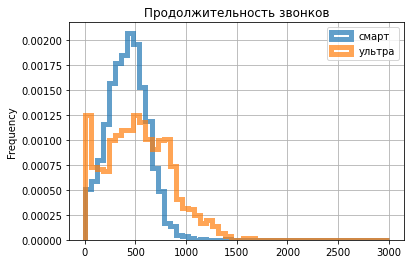

In [66]:
ax = smart_users.plot(
    kind='hist',
    y='duration_sum',
    histtype='step',
    range=(0, 3000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='смарт',
    density=True
)
ultra_users.plot(
    kind='hist',
    y='duration_sum',
    histtype='step',
    range=(0, 3000),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ультра',
    ax=ax,
    grid=True,
    legend=True,
    density=True
)
plt.title('Продолжительность звонков')
plt.show()

<div class="alert alert-info">
    
благодарю, так намного лучше выглядит!)
</div>

Пользователи тарифа Смарт:
- большинство пользователей укладываются в отведенный лимит 500 мину, но достаточное количество пользователей совершает звонки продолжительностью в два раза выше лимита.
- есть небольшой сегмент пользователей, которые вообще не совершают исходящих звонков;
- распределение можно назвать нормальным.

Пользователи тарифа Ультра:
- Распределение скошено вправо;
- Подавляющее большинство пользователей не выговариваеют отведенный лимит в 3000 минут;
- Довольно высок сегмент пользователей, который вообще не используют сотовую связь!
- Самое большое количество абооненотов разговаривают на уровне 250 - 750 минут.

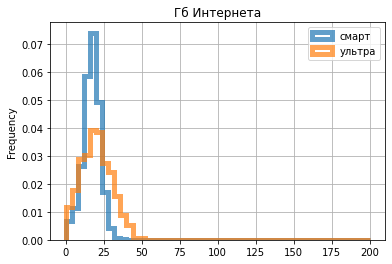

In [67]:
ax = smart_users.plot(
    kind='hist',
    y='mb_used',
    histtype='step',
    range=(0, 200),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='смарт',
    density=True
)
ultra_users.plot(
    kind='hist',
    y='mb_used',
    histtype='step',
    range=(0, 200),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ультра',
    ax=ax,
    grid=True,
    legend=True,
    density=True
)
plt.title('Гб Интернета')
plt.show()

Пользователи тарифа Смарт:
- Самое большое количество пользователей расходуют в месяц от 17-19 Гб интернета;
- В отведенный тарифом лимит в 15 Гб укладывается меньшая часть абонентов;
- Данные распределены нормально.

Пользователи тарифа Ультра:
- Распределение снова скошено вправо;
- некоторая часть пользователей вообще не использует мобильный интернет;
- Большинство из выборки не превышает установленный лимит в 30 Гб.  
- После 45 Гб хвост уже стремится к 0.

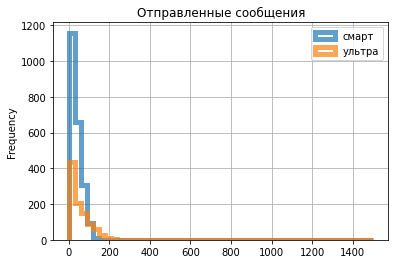

In [68]:
ax = smart_users.plot(
    kind='hist',
    y='messages_count',
    histtype='step',
    range=(0, 1500),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='смарт',
)
ultra_users.plot(
    kind='hist',
    y='messages_count',
    histtype='step',
    range=(0, 1500),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='ультра',
    ax=ax,
    grid=True,
    legend=True,
)
plt.title('Отправленные сообщения')
plt.show()

Пользователи тарифа Смарт:
- Распределение уже нельзя назвать нормальным, так как огромное количество пользователей ввобще не используют услугу (время месседжеров);
- Большая часть пользователей укладывается в отведенный тарифом лимит 50 сообщений;
- некоторое количество пользователей отправляют от 50 до 100 смс;
- совсем уникальные абоненты создают до 150 смс.

Пользователи тарифа Ультра:
- Распределение подобно распределению тарифа Смарт;
- Максимальное количество смс немного больше;
- После 200 сообщений хвост уже приближается к 0.

### Вывод

Заключительные выводы, исходящие из произведенного анализа таковы:
Распределения данных в двух совокупностях пользователей нельзя назвать нормальными, есть выбросы-хвосты в данных, от которых в данном случае избавляться не будем, так как при этом можно потерять цифры выручки, а именно с ней связаны поставленные задачи исследования;
В основном, выручку компании составляют средства, полученные с превышения клиентами обоих тарифов лимита на мобильный интернет. В среднем, абонентам и "смарта" и "ультра" требуется  примерно одинаковое количество Гб интернета. Тариф ультра при этом приносит большую прибыль.
Способ общения посредством смс уходит из повседневности, сотовая связь ещё остается востребованной, но уже выделяется сегмент абонентов, не использующих ее даже при условии включенных в ежемесячный тариф минут.


## Проверка гипотез
Проверить гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
Ответить на вопросы:
- как вы сформулированы нулевая и альтернативная гипотезы;
- какой критерий использован для проверки гипотез и почему.

**№1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Для расчетов будем использовать созданные две совокупности пользователей smart_users и ultra_users. За Н0 (нулевую гипотезу) примем утверждение, что "выручка от абонентов двух тарифов одинакова". Альтернативная гипотеза: "выручка от абонентов двух тарифов отличается".   Проверять  будем с помощью т-теста метода scipy.stats.ttest_ind (так как наши совокупности пользователей не взаимозависимы)

In [69]:
print('Дисперсия по критерию выручки смарт:', smart_users['revenue'].describe()['std']**2)
print('Дисперсия по критерию выручки ультра:', ultra_users['revenue'].describe()['std']**2)

Дисперсия по критерию выручки смарт: 669730.763894807
Дисперсия по критерию выручки ультра: 141387.7148093615


In [70]:
smart = smart_users['revenue']
ultra = ultra_users['revenue']
#за критический уровень статистической значимости принимаем .05
alpha = .05
results = st.ttest_ind(
    smart, 
    ultra, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9270113944209404e-250
Отвергаем нулевую гипотезу


Старый вывод: Что и требовалось доказать, нулевая гипотеза неверна. Выручки от двух тарифов, действительно, отличны. И отличны они так, что выручка от тарифа смарт больше выручки от тарифа ультра. В самом конце пункта 2 представлена таблица, демонстрирующая, что выручка от абонентов тарифа Смарт превышает выручку тарифа:


In [71]:
#средняя выручка по всем услугам по тарифу:
revenue_pivot_mean = df_full.pivot_table(index = 'tariff', values = ['revenue'], aggfunc = 'mean')
revenue_pivot_mean

,revenue
tariff,
smart,1289.641704
ultra,2070.030426


Средняя выручка  от абонентов тарифа ультра превышает выручки от абонентов смарта!!

Понадобятся две новые выборки по принадлежности к региону: moscow и other

In [72]:
moscow = df_full.query('city == "Москва"')
other = df_full.query('city != "Москва"')

Нулевая гипотеза будет звучать как "Выручка от совокупности московских абонентов и немосковских, взятых в целом, приближенно равны", альтернативная - "Выручка от совокупности московских абонентов и немосковских, взятых в целом, отличны"

In [73]:
moscow_revenue = moscow['revenue']
other_revenue = other['revenue']
#за критический уровень статистической значимости принимаем .05
alpha = .05
results = st.ttest_ind(
    moscow_revenue, 
    other_revenue, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000286
Не получилось отвергнуть нулевую гипотезу


Расходы только столичных абонентов делают примерно такую же выручку, как абоненты всей остальной страны, взятые вместе. 

In [74]:
print('Среднее выручки за 2018 год от московских абонентов:', moscow['revenue'].mean())
print('Среднее выручки год от абонентов из остальных регионов:',other['revenue'].mean())

Среднее выручки за 2018 год от московских абонентов: 1546.7135842880523
Среднее выручки год от абонентов из остальных регионов: 1524.7251439539348


### Вывод

Статистический тест позволил ответить на поставленные исследованием вопросы:
- определил, что средняя выручка от пользователей двух тарифов различается;
- средняя выручка пользователи из Москвы почти не отличается от выручки пользователей из других регионов. 

##  Общий вывод

Более прибыльными оказались абоненты тарифа Ультра. Московские абоненты приносят компании денег как все остальные регионы, взятые вместе. Мегалайну стот провести рекламные акции в Москве с целью привлечь большее количество пользователей на тариф Ультра. Чтобы смоделировать оптимальные условия перехода для компании и привлекательные для абонентов, нужно проводить специальное  тестирование.
